In [0]:
!pip install unicodecsv

import calendar
import unicodecsv
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
from string import ascii_letters
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns
pd.options.display.max_rows
plt.style.use('bmh')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format

  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp36-none-any.whl size=10767 sha256=43819891a67df4538edc7a85227ade44cc64b8b6abac4a6b58eece2f734e14a1
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
Successfully built unicodecsv


In [0]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-drivers cuda-npp-10-1 cuda-npp-dev-10-1
  cuda-nsight-10-1 cuda-nsight-compute-10-1 cuda-nsight-systems-10-1
  cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1 cuda-nvjpeg-10-1
  cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1 cuda-nvvp-10-1
  default-jre dkms freeglut3 freeglut3-dev keyboard-configuration libargon2-0
  libcap2 libcryptsetup12 libdevmapper1.02.1 libfontenc1 libgtk2.0-0
  libgtk2.0-common libidn11 libip4tc0 libjansson4 libnvidia-cfg1-440
  libnvidia-common-430 libnvidia-common-440 libnvidia-decode-440
  libnvidia-encode-440 libnvidia-fbc1-440 libnvidia-gl-440 libnvidia-ifr1-440
 

In [0]:
!unzip "/content/flights.zip"

Archive:  /content/flights.zip
  inflating: flights.pkl             


In [0]:
%time flights = pd.read_pickle('flights.pkl') #read and load saved dataframe to continued analysis
display(flights.shape)

CPU times: user 2.88 s, sys: 2.14 s, total: 5.02 s
Wall time: 5.07 s


(2673761, 67)

In [0]:
flights.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_D

In [0]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673761 entries, 0 to 2673760
Data columns (total 67 columns):
YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                  object
OP_UNIQUE_CARRIER        object
OP_CARRIER_AIRLINE_ID    int64
OP_CARRIER               object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
ORIGIN_AIRPORT_SEQ_ID    int64
ORIGIN_CITY_MARKET_ID    int64
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_NM          object
DEST_AIRPORT_ID          int64
DEST_AIRPORT_SEQ_ID      int64
DEST_CITY_MARKET_ID      int64
DEST                     object
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_NM            object
CRS_DEP_TIME             int64
DEP_TIME                 float64
DEP_DELAY                float64
DEP_DELAY_NEW            float64
DE

In [0]:
# view the head of the dataframe
flights.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Monthd,MY,carrier_name,ORIGIN_AirportName,ORIGIN_latitude,ORIGIN_longitude,ORIGIN_elevation_ft,DEST_AirportName,DEST_latitude,DEST_longitude,DEST_elevation_ft
0,2018,4,10,1,1,2018-10-01,WN,19393,WN,4025,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,1555,1610.0000,15.0000,15.0000,1.0000,1.0000,1500-1559,10.0000,1620.0000,1903.0000,3.0000,1850,1906.0000,16.0000,16.0000,1.0000,1.0000,1800-1859,0.0000,E,0.0000,115.0000,116.0000,103.0000,1.0000,759.0000,4,2.0000,0.0000,1.0000,0.0000,13.0000,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.0402,-106.6090,5355,William P Hobby,29.6454,-95.2789,46
1,2018,4,10,26,5,2018-10-26,WN,19393,WN,530,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,650,743.0000,53.0000,53.0000,1.0000,3.0000,0600-0659,10.0000,753.0000,1032.0000,2.0000,950,1034.0000,44.0000,44.0000,1.0000,2.0000,0900-0959,0.0000,E,0.0000,120.0000,111.0000,99.0000,1.0000,759.0000,4,44.0000,0.0000,0.0000,0.0000,0.0000,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.0402,-106.6090,5355,William P Hobby,29.6454,-95.2789,46
2,2018,4,10,26,5,2018-10-26,WN,19393,WN,983,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,1540,1658.0000,78.0000,78.0000,1.0000,5.0000,1500-1559,13.0000,1711.0000,1947.0000,4.0000,1840,1951.0000,71.0000,71.0000,1.0000,4.0000,1800-1859,0.0000,E,0.0000,120.0000,113.0000,96.0000,1.0000,759.0000,4,71.0000,0.0000,0.0000,0.0000,0.0000,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.0402,-106.6090,5355,William P Hobby,29.6454,-95.2789,46
3,2018,4,10,25,4,2018-10-25,WN,19393,WN,983,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,1540,1628.0000,48.0000,48.0000,1.0000,3.0000,1500-1559,10.0000,1638.0000,1915.0000,4.0000,1840,1919.0000,39.0000,39.0000,1.0000,2.0000,1800-1859,0.0000,E,0.0000,120.0000,111.0000,97.0000,1.0000,759.0000,4,0.0000,0.0000,18.0000,0.0000,21.0000,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.0402,-106.6090,5355,William P Hobby,29.6454,-95.2789,46
4,2018,4,10,11,4,2018-10-11,WN,19393,WN,983,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,New Mexico,12191,1219102,31453,HOU,"Houston, TX",TX,Texas,1540,1638.0000,58.0000,58.0000,1.0000,3.0000,1500-1559,10.0000,1648.0000,1922.0000,4.0000,1840,1926.0000,46.0000,46.0000,1.0000,3.0000,1800-1859,0.0000,E,0.0000,120.0000,108.0000,94.0000,1.0000,759.0000,4,9.0000,0.0000,0.0000,0.0000,37.0000,Oct,Oct_2018,Southwest Airlines Co.,Albuquerque International Sunport,35.0402,-106.6090,5355,William P Hobby,29.6454,-95.2789,46


In [0]:
# view the tail of the dataframe
flights.tail()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Monthd,MY,carrier_name,ORIGIN_AirportName,ORIGIN_latitude,ORIGIN_longitude,ORIGIN_elevation_ft,DEST_AirportName,DEST_latitude,DEST_longitude,DEST_elevation_ft
2673756,2018,3,9,30,7,2018-09-30,OO,20304,OO,5102,12519,1251902,32519,JMS,"Jamestown, ND",ND,North Dakota,11447,1144705,31447,DVL,"Devils Lake, ND",ND,North Dakota,1310,1359.0000,49.0000,49.0000,1.0000,3.0000,1300-1359,16.0000,1415.0000,1434.0000,5.0000,1350,1439.0000,49.0000,49.0000,1.0000,3.0000,1300-1359,0.0000,E,0.0000,40.0000,40.0000,19.0000,1.0000,83.0000,1,49.0000,0.0000,0.0000,0.0000,0.0000,Sep,Sep_2018,SkyWest Airlines Inc.,Jamestown Regional,46.9297,-98.6782,1500,Devils Lake Regional,48.1142,-98.9088,1456
2673757,2018,3,9,3,1,2018-09-03,OO,20304,OO,5102,12519,1251902,32519,JMS,"Jamestown, ND",ND,North Dakota,11447,1144705,31447,DVL,"Devils Lake, ND",ND,North Dakota,1310,1329.0000,19.0000,19.0000,1.0000,1.0000,1300-1359,15.0000,1344.0000,1403.0000,3.0000,1350,1406.0000,16.0000,16.0000,1.0000,1.0000,1300-1359,0.0000,E,0.0000,40.0000,37.0000,19.0000,1.0000,83.0000,1,0.0000,0.0000,0.0000,0.0000,16.0000,Sep,Sep_2018,SkyWest Airlines Inc.,Jamestown Regional,46.9297,-98.6782,1500,Devils Lake Regional,48.1142,-98.9088,1456
2673758,2018,3,9,14,5,2018-09-14,OO,20304,OO,5102,12519,1251902,32519,JMS,"Jamestown, ND",ND,North Dakota,11447,1144705,31447,DVL,"Devils Lake, ND",ND,North Dakota,1310,1329.0000,19.0000,19.0000,1.0000,1.0000,1300-1359,17.0000,1346.0000,1405.0000,4.0000,1350,1409.0000,19.0000,19.0000,1.0000,1.0000,1300-1359,0.0000,E,0.0000,40.0000,40.0000,19.0000,1.0000,83.0000,1,0.0000,0.0000,0.0000,0.0000,19.0000,Sep,Sep_2018,SkyWest Airlines Inc.,Jamestown Regional,46.9297,-98.6782,1500,Devils Lake Regional,48.1142,-98.9088,1456
2673759,2018,3,9,14,5,2018-09-14,OO,20304,OO,5104,12519,1251902,32519,JMS,"Jamestown, ND",ND,North Dakota,11447,1144705,31447,DVL,"Devils Lake, ND",ND,North Dakota,2315,2329.0000,14.0000,14.0000,0.0000,0.0000,2300-2359,24.0000,2353.0000,13.0000,7.0000,2359,20.0000,21.0000,21.0000,1.0000,1.0000,2300-2359,0.0000,E,0.0000,44.0000,51.0000,20.0000,1.0000,83.0000,1,0.0000,0.0000,7.0000,0.0000,14.0000,Sep,Sep_2018,SkyWest Airlines Inc.,Jamestown Regional,46.9297,-98.6782,1500,Devils Lake Regional,48.1142,-98.9088,1456
2673760,2018,3,9,24,1,2018-09-24,OO,20304,OO,5102,12519,1251902,32519,JMS,"Jamestown, ND",ND,North Dakota,11447,1144705,31447,DVL,"Devils Lake, ND",ND,North Dakota,1310,1457.0000,107.0000,107.0000,1.0000,7.0000,1300-1359,12.0000,1509.0000,1529.0000,5.0000,1350,1534.0000,104.0000,104.0000,1.0000,6.0000,1300-1359,0.0000,E,0.0000,40.0000,37.0000,20.0000,1.0000,83.0000,1,67.0000,0.0000,0.0000,0.0000,37.0000,Sep,Sep_2018,SkyWest Airlines Inc.,Jamestown Regional,46.9297,-98.6782,1500,Devils Lake Regional,48.1142,-98.9088,1456


In [0]:
# get the list of numerical variables
num_cols = ['DEP_DEL15','DAY_OF_WEEK','DEP_TIME','CRS_DEP_TIME','CRS_ARR_TIME','AIR_TIME','DISTANCE']

# get the list of categorical variables
cat_cols = ['OP_UNIQUE_CARRIER']

In [0]:
# create a new dataframe using the numerical and categorical columns
total_cols = num_cols + cat_cols
df_new = flights[total_cols]

df_new.head()

,DEP_DEL15,DAY_OF_WEEK,DEP_TIME,CRS_DEP_TIME,CRS_ARR_TIME,AIR_TIME,DISTANCE,OP_UNIQUE_CARRIER
0,1.0000,1,1610.0000,1555,1850,103.0000,759.0000,WN
1,1.0000,5,743.0000,650,950,99.0000,759.0000,WN
2,1.0000,5,1658.0000,1540,1840,96.0000,759.0000,WN
3,1.0000,4,1628.0000,1540,1840,97.0000,759.0000,WN
4,1.0000,4,1638.0000,1540,1840,94.0000,759.0000,WN


In [0]:
# view the unique value of the categorical columns
df_new[cat_cols].nunique()

OP_UNIQUE_CARRIER    18
dtype: int64

In [0]:
# convert the data types of some of the columns
int_cols = ['DEP_DEL15','DEP_TIME','AIR_TIME','DISTANCE']

df_new[int_cols] = df_new[int_cols].astype('int')

In [0]:
# view the head of the dataframe
df_new.head()

,DEP_DEL15,DAY_OF_WEEK,DEP_TIME,CRS_DEP_TIME,CRS_ARR_TIME,AIR_TIME,DISTANCE,OP_UNIQUE_CARRIER
0,1,1,1610,1555,1850,103,759,WN
1,1,5,743,650,950,99,759,WN
2,1,5,1658,1540,1840,96,759,WN
3,1,4,1628,1540,1840,97,759,WN
4,1,4,1638,1540,1840,94,759,WN


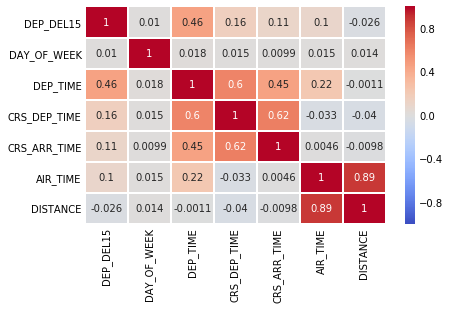

In [0]:
# correlation between these variables
corr = df_new.corr()

sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1,lw=1)

Text(0.5, 1.0, 'Distribution of Transformed Distance')

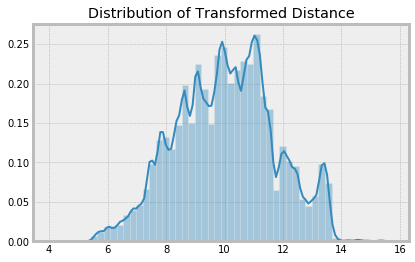

In [0]:
# use t-tests to determine if the Canceled variable has an association with either the AIR_Time or Distance variables
ax = sns.distplot(stats.boxcox(df_new['DISTANCE'])[0])
ax.set_title('Distribution of Transformed Distance')

In [0]:
df2 = df_new.copy()

In [0]:
# perform the transformation on SchedElapsedTime
df2['CRS_DEP_TIME_transform'] = stats.boxcox(df2['CRS_DEP_TIME'])[0]

df2.head()

,DEP_DEL15,DAY_OF_WEEK,DEP_TIME,CRS_DEP_TIME,CRS_ARR_TIME,AIR_TIME,DISTANCE,OP_UNIQUE_CARRIER,CRS_DEP_TIME_transform
0,1,1,1610,1555,1850,103,759,WN,5943.8867
1,1,5,743,650,950,99,759,WN,2071.4189
2,1,5,1658,1540,1840,96,759,WN,5874.6724
3,1,4,1628,1540,1840,97,759,WN,5874.6724
4,1,4,1638,1540,1840,94,759,WN,5874.6724


In [0]:
# remove the columns that were noted earlier as well as the original CRS_DEP_TIME column to simplify things
df2.drop(['AIR_TIME','CRS_DEP_TIME'],axis=1,inplace=True)

df2.head()

,DEP_DEL15,DAY_OF_WEEK,DEP_TIME,CRS_ARR_TIME,DISTANCE,OP_UNIQUE_CARRIER,CRS_DEP_TIME_transform
0,1,1,1610,1850,759,WN,5943.8867
1,1,5,743,950,759,WN,2071.4189
2,1,5,1658,1840,759,WN,5874.6724
3,1,4,1628,1840,759,WN,5874.6724
4,1,4,1638,1840,759,WN,5874.6724


In [0]:
# Create dummy variables for analysis
%time df_pred = pd.get_dummies(df2)
%time df_pred.to_pickle('df_pred.pkl')
df_pred.head() 

CPU times: user 329 ms, sys: 22.9 ms, total: 352 ms
Wall time: 352 ms
CPU times: user 128 ms, sys: 400 ms, total: 528 ms
Wall time: 528 ms


,DEP_DEL15,DAY_OF_WEEK,DEP_TIME,CRS_ARR_TIME,DISTANCE,CRS_DEP_TIME_transform,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_G4,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_NK,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_VX,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_YX
0,1,1,1610,1850,759,5943.8867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,5,743,950,759,2071.4189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,5,1658,1840,759,5874.6724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,4,1628,1840,759,5874.6724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,4,1638,1840,759,5874.6724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
# view the shape of the dataframe
df_pred.shape

(2673761, 24)

In [0]:
# view the data type
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673761 entries, 0 to 2673760
Data columns (total 24 columns):
DEP_DEL15                 int64
DAY_OF_WEEK               int64
DEP_TIME                  int64
CRS_ARR_TIME              int64
DISTANCE                  int64
CRS_DEP_TIME_transform    float64
OP_UNIQUE_CARRIER_9E      uint8
OP_UNIQUE_CARRIER_AA      uint8
OP_UNIQUE_CARRIER_AS      uint8
OP_UNIQUE_CARRIER_B6      uint8
OP_UNIQUE_CARRIER_DL      uint8
OP_UNIQUE_CARRIER_EV      uint8
OP_UNIQUE_CARRIER_F9      uint8
OP_UNIQUE_CARRIER_G4      uint8
OP_UNIQUE_CARRIER_HA      uint8
OP_UNIQUE_CARRIER_MQ      uint8
OP_UNIQUE_CARRIER_NK      uint8
OP_UNIQUE_CARRIER_OH      uint8
OP_UNIQUE_CARRIER_OO      uint8
OP_UNIQUE_CARRIER_UA      uint8
OP_UNIQUE_CARRIER_VX      uint8
OP_UNIQUE_CARRIER_WN      uint8
OP_UNIQUE_CARRIER_YV      uint8
OP_UNIQUE_CARRIER_YX      uint8
dtypes: float64(1), int64(5), uint8(18)
memory usage: 188.7 MB


**Logistic Regression**

Now that the data has been explored and cleaned, we can begin the process of building a logistic regression model. First, will split the dependent variable ('Cancelled') out from the independent variables. Then, we need to create our train and test datasets. We will hold out 20% of the data as a test set and use the rest to train the model. This will result in 4 new variables: X_train, X_test, y_train, and y_test

In [0]:
y = df_pred['DEP_DEL15']
X = df_pred.drop('DEP_DEL15',axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=888)
# change test size to 0.3

In order to avoid overfitting the model, we will use stratified k-fold cross validation on the training dataset. We will start by using 10 folds and adjust accordingly if model computation time is too lengthy.

In [0]:
# create the cross validation object
kfold = StratifiedKFold(n_splits=10, random_state=888)

In [0]:
# create the logistic regrssion
lr_model = LogisticRegressionCV(cv=kfold,class_weight='balanced',random_state=888)

In [0]:
lr_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced',
                     cv=StratifiedKFold(n_splits=10, random_state=888, shuffle=False),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=None, penalty='l2', random_state=888, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
lr_model.score(X_test,y_test)

0.7855569366024667

In [0]:
y_pred_lr = lr_model.predict(X_test)

In [0]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60    231762
           1       0.83      0.88      0.85    570367

    accuracy                           0.79    802129
   macro avg       0.74      0.72      0.73    802129
weighted avg       0.78      0.79      0.78    802129



Text(0.5, 36.5, 'Predicted Label')

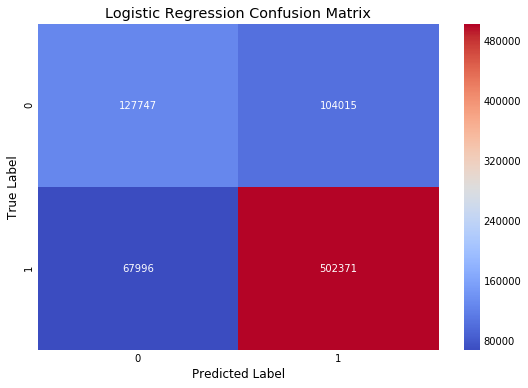

In [0]:
lr_cm = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(8,6))
ax = sns.heatmap(lr_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')